# Imports etc.

In [ ]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)

In [ ]:
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

# Get data

## Task data

In [ ]:
def raw_data_row2pd(data_row):
    
    return pd.DataFrame(json.loads(data_row['trialdata']))

# # Use
# pd.concat([raw_data_row2pd(task_data_raw[i[0]]) for i in trial_data_rows])

In [ ]:
def raw_data2rule_data(rule_row, i):
    
    rule_cols = ['middleRules', 'lowTransferRules', 'highTransferRules', 'highRules']
    rules_dat = pd.DataFrame({rule_col: rule_row['trialdata'][rule_col] for rule_col in rule_cols})
    rules_dat['section'] = i
    rules_dat = rules_dat.reset_index().rename(columns={'index': 'goal_id'})
    
    return rules_dat

# Use
pd.concat([raw_data2rule_data(rule_row, i) for i, rule_row in enumerate(rule_rows)])
# raw_data2rule_data(rule_rows[0], 0)

In [ ]:
# Read in and process data
file_names = os.listdir(data_dir)
all_data = pd.DataFrame()
all_rules = pd.DataFrame()

for sid, file_name in enumerate(file_names):
    
    # Read in raw data
    with open(os.path.join(data_dir, file_name)) as f:
        raw_data = json.load(f)

    # Get actual task data
    subj_data_raw = raw_data['data']

    trial_data_len = [len(subj_data_raw[i]['trialdata']) for i in range(len(subj_data_raw))]
    trial_data_rows = np.argwhere(np.array(trial_data_len) > 10000).flatten()  # rows with less than 10000 entries contain other stuff (e.g., rules)

    subj_data = pd.concat([raw_data_row2pd(subj_data_raw[i]) for i in trial_data_rows])
    
    # Add basic info
    subj_data['sid'] = sid
    subj_data['workerId'] = raw_data['workerId']
    subj_data['counterbalance'] = raw_data['counterbalance']
    subj_data['start_dateTime'] = raw_data['data'][0]['dateTime']
    subj_data['end_dateTime'] = raw_data['data'][-1]['dateTime']

    # Combine all subjects
    all_data = pd.concat([all_data, subj_data])
    
    # Get rule data
    rule_row_idx = np.argwhere(np.array(trial_data_len) == 21).flatten()  # trials with length 21 contain the rules
    rule_rows = [raw_data['data'][i] for i in rule_row_idx]
    
    subj_rules = pd.concat([raw_data2rule_data(rule_row, i) for i, rule_row in enumerate(rule_rows)])
    subj_rules['sid'] = sid
    
    all_rules = pd.concat([all_rules, subj_rules])

all_rules

In [173]:
rule_cols = ['middleRules', 'lowTransferRules', 'highTransferRules', 'highRules']
rules_dict1 = {rule_col: dat['data'][1]['trialdata'][rule_col] for rule_col in rule_cols}
rules_dict2 = {rule_col: dat['data'][22]['trialdata'][rule_col] for rule_col in rule_cols}
rules_dict1, rules_dict2

({'middleRules': {'1': [3, 0], '0': [0, 1], '3': [1, 2], '2': [2, 3]},
  'lowTransferRules': {'1': [3, 1], '0': [0, 1], '3': [0, 2], '2': [2, 3]},
  'highTransferRules': {'1': [1, 3], '0': [0, 2], '3': [3, 2], '2': [1, 0]},
  'highRules': {'1': [2, 3], '0': [0, 2], '3': [3, 1], '2': [1, 0]}},
 {'middleRules': {'1': [0, 1], '0': [2, 3], '3': [3, 0], '2': [1, 2]},
  'lowTransferRules': {'1': [0, 1], '0': [2, 3], '3': [3, 1], '2': [0, 2]},
  'highTransferRules': {'1': [2, 0], '0': [1, 0], '3': [3, 2], '2': [3, 1]},
  'highRules': {'1': [2, 3], '0': [1, 0], '3': [0, 2], '2': [3, 1]}})

In [275]:
# # pd.DataFrame(json.loads(task_data_raw[2]['trialdata']))
# raw_data_row2pd(task_data_raw[12])

In [273]:
# trial_data_len = [len(task_data_raw[i]['trialdata']) for i in range(len(task_data_raw))]
# trial_data_rows = np.argwhere(np.array(trial_data_len) > 10000)
# trial_data_rows

In [274]:
# pd.concat([raw_data_row2pd(task_data_raw[i[0]]) for i in trial_data_rows])

In [89]:
def trial_data_row2df(row):
    
    return pd.DataFrame(json.loads(row))

# Use
trial_data_row2df(trial_data.loc[2])

,rt,stimulus,key_press,phase,block,trial,subtrial,trial_type,trial_index,time_elapsed,...,action_id,action_name,middle_item_name,middle_item,goal_star_name,goal_star,correct,unlocked_star,unlocked_star_name,timeout
0,152.065,0,79.0,B,0,0,0,learning,33,64604,...,1,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1130.325,0,73.0,B,0,0,1,learning,34,65738,...,0,I,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,482.005,0,79.0,B,0,0,2,learning,35,66223,...,1,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,254.295,0,80.0,B,0,0,3,learning,36,66481,...,3,P,NaN,-1.0,2.0,3.0,None,-1.0,-1.0,NaN
4,NaN,0,NaN,B,0,0,4,learning,37,66986,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,NaN,0,NaN,B,0,23,4,learning,148,128259,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,978.345,0,73.0,B,0,24,0,learning,149,129241,...,0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,260.375,0,79.0,B,0,24,1,learning,150,129504,...,1,O,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116,731.520,0,85.0,B,0,24,2,learning,151,130239,...,2,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
pd.concat([pd.DataFrame(json.loads(dat['data'][i]['trialdata'])) for i in range(2, 21)])

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,action_id,action_name,block,correct,goal_star,goal_star_name,internal_node_id,key_press,middle_item,middle_item_name,...,rt,stimulus,subtrial,time_elapsed,timeout,trial,trial_index,trial_type,unlocked_star,unlocked_star_name
0,1,O,0,NaN,NaN,NaN,0.0-17.0-0.0,79.0,NaN,NaN,...,152.065,0,0,64604,NaN,0,33,learning,NaN,NaN
1,0,I,0,NaN,NaN,NaN,0.0-17.0-1.0,73.0,-1.0,NaN,...,1130.325,0,1,65738,NaN,0,34,learning,NaN,NaN
2,1,O,0,NaN,NaN,NaN,0.0-17.0-2.0,79.0,NaN,NaN,...,482.005,0,2,66223,NaN,0,35,learning,NaN,NaN
3,3,P,0,None,3.0,2.0,0.0-17.0-3.0,80.0,-1.0,NaN,...,254.295,0,3,66481,NaN,0,36,learning,-1.0,-1.0
4,-1,NaN,0,NaN,NaN,NaN,0.0-17.0-4.0,NaN,NaN,NaN,...,NaN,0,4,66986,NaN,0,37,learning,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-1,NaN,6,NaN,NaN,NaN,0.0-508.0-4.0,NaN,NaN,NaN,...,NaN,0,4,862786,NaN,23,2407,transfer,NaN,NaN
120,3,P,6,NaN,NaN,NaN,0.0-509.0-0.0,80.0,NaN,NaN,...,292.145,0,0,863084,NaN,24,2408,transfer,NaN,NaN
121,1,O,6,NaN,NaN,NaN,0.0-509.0-1.0,79.0,3.0,1.0,...,85.040,0,1,863175,NaN,24,2409,transfer,NaN,NaN
122,0,I,6,NaN,NaN,NaN,0.0-509.0-2.0,73.0,NaN,NaN,...,152.760,0,2,863333,NaN,24,2410,transfer,NaN,NaN


In [159]:
pd.DataFrame(json.loads(dat['data'][4]['trialdata']))

,rt,stimulus,key_press,phase,block,trial,subtrial,trial_type,trial_index,time_elapsed,...,points,action_id,action_name,middle_item_name,middle_item,goal_star_name,goal_star,correct,unlocked_star,unlocked_star_name
0,1124.935,0,79.0,B,2,0,0,learning,278,187324,...,3,1,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187.265,0,85.0,B,2,0,1,learning,279,187513,...,3,2,U,3.0,2.0,NaN,NaN,NaN,NaN,NaN
2,212.095,0,79.0,B,2,0,2,learning,280,187729,...,3,1,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,130.570,0,85.0,B,2,0,3,learning,281,187863,...,3,2,U,3.0,2.0,1.0,2.0,None,-1.0,-1.0
4,NaN,0,NaN,B,2,0,4,learning,282,188367,...,3,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,NaN,0,NaN,B,2,23,4,learning,397,226074,...,3,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,778.260,0,73.0,B,2,24,0,learning,398,226857,...,3,0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,255.595,0,80.0,B,2,24,1,learning,399,227116,...,3,3,P,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
122,210.850,0,73.0,B,2,24,2,learning,400,227330,...,3,0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
data_raw = pd.DataFrame.from_dict(dat, orient='index').T['data'][0]
trial_data = pd.DataFrame(data_raw)['trialdata']
trial_data

0         {'phase': 'questionnaire', 'status': 'begin'}
1     {'rt': 8486.140000168234, 'learnGoals': [3, 1,...
2     [{"rt":152.06500003114343,"stimulus":0,"key_pr...
3     [{"rt":955.5500000715256,"stimulus":0,"key_pre...
4     [{"rt":1124.9350002035499,"stimulus":0,"key_pr...
5     [{"rt":154.24500009976327,"stimulus":0,"key_pr...
6     [{"rt":355.72999995201826,"stimulus":0,"key_pr...
7     [{"rt":458.0749999731779,"stimulus":0,"key_pre...
8     [{"rt":608.1550000235438,"stimulus":0,"key_pre...
9     [{"rt":509.9899999331683,"stimulus":0,"key_pre...
10    [{"rt":1692.5049999263138,"stimulus":0,"key_pr...
11    [{"rt":753.3950000070035,"stimulus":0,"key_pre...
12    [{"rt":713.2149999961257,"stimulus":0,"key_pre...
13    [{"rt":411.9599999394268,"stimulus":0,"key_pre...
14    [{"rt":2188.300000037998,"stimulus":0,"key_pre...
15    [{"rt":660.6449999380857,"stimulus":0,"key_pre...
16    [{"rt":2442.585000069812,"stimulus":0,"key_pre...
17    [{"rt":362.39499994553626,"stimulus":0,"ke

In [101]:
def trial_data_blocks2df(blocks):
    
    return pd.concat([block.reset_index(drop=True).tolist() for block in blocks])

# Use
trial_data_block1 = trial_data.loc[2:21].apply(trial_data_row2df)
trial_data_block2 = trial_data.loc[23:].apply(trial_data_row2df)
trial_data_block2df([trial_data_block1, trial_data_block2])

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,action_id,action_name,block,correct,goal_star,goal_star_name,internal_node_id,key_press,middle_item,middle_item_name,...,rt,stimulus,subtrial,time_elapsed,timeout,trial,trial_index,trial_type,unlocked_star,unlocked_star_name
0,1,O,0,NaN,NaN,NaN,0.0-17.0-0.0,79.0,NaN,NaN,...,152.065,0,0,64604,NaN,0,33,learning,NaN,NaN
1,0,I,0,NaN,NaN,NaN,0.0-17.0-1.0,73.0,-1.0,NaN,...,1130.325,0,1,65738,NaN,0,34,learning,NaN,NaN
2,1,O,0,NaN,NaN,NaN,0.0-17.0-2.0,79.0,NaN,NaN,...,482.005,0,2,66223,NaN,0,35,learning,NaN,NaN
3,3,P,0,None,3.0,2.0,0.0-17.0-3.0,80.0,-1.0,NaN,...,254.295,0,3,66481,NaN,0,36,learning,-1.0,-1.0
4,-1,NaN,0,NaN,NaN,NaN,0.0-17.0-4.0,NaN,NaN,NaN,...,NaN,0,4,66986,NaN,0,37,learning,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-1,NaN,7,NaN,NaN,NaN,0.0-534.0-4.0,NaN,NaN,NaN,...,NaN,0,4,889022,NaN,23,2533,transfer,NaN,NaN
120,0,I,7,NaN,NaN,NaN,0.0-535.0-0.0,73.0,NaN,NaN,...,110.975,0,0,889138,NaN,24,2534,transfer,NaN,NaN
121,1,O,7,NaN,NaN,NaN,0.0-535.0-1.0,79.0,0.0,0.0,...,14.105,0,1,889158,NaN,24,2535,transfer,NaN,NaN
122,2,U,7,NaN,NaN,NaN,0.0-535.0-2.0,85.0,NaN,NaN,...,126.015,0,2,889290,NaN,24,2536,transfer,NaN,NaN


In [91]:
pd.concat(trial_data.loc[2:21].apply(trial_data_row2df).reset_index(drop=True).tolist())

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,action_id,action_name,block,correct,goal_star,goal_star_name,internal_node_id,key_press,middle_item,middle_item_name,...,rt,stimulus,subtrial,time_elapsed,timeout,trial,trial_index,trial_type,unlocked_star,unlocked_star_name
0,1,O,0,NaN,NaN,NaN,0.0-17.0-0.0,79.0,NaN,NaN,...,152.065,0,0,64604,NaN,0,33,learning,NaN,NaN
1,0,I,0,NaN,NaN,NaN,0.0-17.0-1.0,73.0,-1.0,NaN,...,1130.325,0,1,65738,NaN,0,34,learning,NaN,NaN
2,1,O,0,NaN,NaN,NaN,0.0-17.0-2.0,79.0,NaN,NaN,...,482.005,0,2,66223,NaN,0,35,learning,NaN,NaN
3,3,P,0,None,3.0,2.0,0.0-17.0-3.0,80.0,-1.0,NaN,...,254.295,0,3,66481,NaN,0,36,learning,-1.0,-1.0
4,-1,NaN,0,NaN,NaN,NaN,0.0-17.0-4.0,NaN,NaN,NaN,...,NaN,0,4,66986,NaN,0,37,learning,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-1,NaN,7,NaN,NaN,NaN,0.0-534.0-4.0,NaN,NaN,NaN,...,NaN,0,4,889022,NaN,23,2533,transfer,NaN,NaN
120,0,I,7,NaN,NaN,NaN,0.0-535.0-0.0,73.0,NaN,NaN,...,110.975,0,0,889138,NaN,24,2534,transfer,NaN,NaN
121,1,O,7,NaN,NaN,NaN,0.0-535.0-1.0,79.0,0.0,0.0,...,14.105,0,1,889158,NaN,24,2535,transfer,NaN,NaN
122,2,U,7,NaN,NaN,NaN,0.0-535.0-2.0,85.0,NaN,NaN,...,126.015,0,2,889290,NaN,24,2536,transfer,NaN,NaN


In [16]:
# file_names = [f for f in os.listdir(data_dir) if 'subj' in f]
# file_names = ["CHaRLy_subj19_202067_13_50.json", "CHaRLy_subj67_202067_20_33.json"]
file_names = os.listdir(data_dir)[1:]

all_data_raw = pd.DataFrame()
for sid, file_name in enumerate(file_names):
    
    print("Reading in {}".format(file_name))
    
    # Get raw json
#     sid = int(file_name.split("_")[1][-2:])
    subj_dat = pd.read_json(os.path.join(data_dir, file_name))
    subj_dat['sid'] = sid
    
    # Combine
    all_data_raw = pd.concat([all_data_raw, subj_dat])
    
all_data_raw

Reading in 3DPNQGW4LMGF4OGZAOQ1DEOXOYN46Y.json


ValueError: Unexpected character found when decoding array value (2)

In [52]:
interesting_cols = [
    'rt', 'trial_type', 'phase', 'block', 'trial', 'trial_', 'subtrial', 'points', #'key_press',
    'action_id', 'middle_item_name', 'goal_star_name', 'goal_star', 'correct', 'unlocked_star', #'middle_item',
    'unlocked_star_name', 'timeout', #'action_name',
]

In [53]:
all_data = all_data_raw.loc[all_data_raw.trial_type.isin(['learning', 'transfer'])]  # remove instructions
all_data = all_data.loc[all_data.subtrial.isin(range(4))]  # remove 5th (feedback) trial
all_data['phase'] = pd.Categorical(all_data['phase']).rename_categories({'A': 'high', 'B': 'low'})
all_data['trial_'] = all_data['block'] * 25 + all_data['trial']
all_data = all_data.reset_index(drop=True)
all_data[interesting_cols]

,rt,trial_type,phase,block,trial,trial_,subtrial,points,action_id,middle_item_name,goal_star_name,goal_star,correct,unlocked_star,unlocked_star_name,timeout
0,486.195,learning,low,0.0,0.0,0.0,0.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,605.880,learning,low,0.0,0.0,0.0,1.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1040.145,learning,low,0.0,0.0,0.0,2.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,394.360,learning,low,0.0,0.0,0.0,3.0,3.0,2.0,NaN,0.0,1.0,NaN,-1.0,-1.0,NaN
4,389.975,learning,low,0.0,1.0,1.0,0.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7131,1401.360,transfer,high,0.0,15.0,15.0,2.0,282.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7132,246.925,transfer,high,0.0,15.0,15.0,3.0,282.0,1.0,1.0,1.0,1.0,NaN,-1.0,-1.0,NaN
7133,619.470,transfer,high,0.0,16.0,16.0,0.0,282.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7134,231.015,transfer,high,0.0,16.0,16.0,1.0,282.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
all_data_raw.columns

Index(['rt', 'stimulus', 'key_press', 'trial_type', 'trial_index',
       'time_elapsed', 'internal_node_id', 'phase', 'block', 'trial',
       'subtrial', 'points', 'action_id', 'middle_item_name', 'middle_item',
       'goal_star_name', 'goal_star', 'correct', 'unlocked_star',
       'unlocked_star_name', 'permKeys', 'permKeysOrder', 'permMiddleItems',
       'permStars', 'middleRules', 'highRules', 'lowTransferRules',
       'highTransferRules', 'taskVer', 'phaseNum', 'keys', 'letters',
       'learnGoals', 'transferGoals', 'action_name', 'timeout', 'type', 'sid'],
      dtype='object')

## Task duration

In [64]:
dur_dat = all_data.groupby(['sid']).aggregate(['min', 'max'])['time_elapsed'].reset_index()
dur_dat

,sid,min,max
0,19,145800,1806710
1,67,56652,1913718


In [61]:
s19 = 1806710 - 145800
s67 = 1913718 - 56652

def msec2min(msec):
    
    sec = msec / 1000
    minutes = sec / 60
    return minutes

# Example use
msec2min(s19), msec2min(s67)

(27.681833333333334, 30.9511)

In [65]:
dur_dat['dur_in_minutes'] = msec2min(dur_dat['max'] - dur_dat['min'])
dur_dat

,sid,min,max,dur_in_minutes
0,19,145800,1806710,27.681833
1,67,56652,1913718,30.951100


## Rules

In [7]:
# Get raw rules data
rule_rows = all_data_raw.highTransferRules.apply(lambda x : type(x) == dict)
rule_cols = ['permKeys', 'permKeysOrder', 'permMiddleItems', 'permStars', 'middleRules', 'highRules',
             'lowTransferRules', 'highTransferRules', 'taskVer', 'phaseNum', 'keys', 'letters',
             'learnGoals', 'transferGoals']
rule_data_raw = all_data_raw.loc[rule_rows, ['sid'] + rule_cols].reset_index(drop=True)
rule_data_raw['taskVer'] = pd.Categorical(rule_data_raw['taskVer']).rename_categories({'A': 'high', 'B': 'low'})
rule_data_raw = rule_data_raw.rename(columns={'middleRules': 'lowRules', 'taskVer': 'phase'})
rule_data_raw

,sid,permKeys,permKeysOrder,permMiddleItems,permStars,lowRules,highRules,lowTransferRules,highTransferRules,phase,phaseNum,keys,letters,learnGoals,transferGoals
0,19,"[79, 73, 80, 85]","[2, 1, 3, 0]","[2, 0, 1, 3]","[1, 0, 3, 2]","{'0': [2, 3], '1': [1, 2], '2': [0, 1], '3': [...","{'0': [1, 3], '1': [2, 0], '2': [3, 2], '3': [...","{'0': [2, 3], '1': [0, 2], '2': [0, 1], '3': [...","{'0': [1, 0], '1': [2, 0], '2': [3, 2], '3': [...",low,0.0,"[85, 73, 79, 80]","[U, I, O, P]","[1, 3, 0, 2, 0, 2, 3, 1, 3, 0, 2, 1]","[1, 2, 1, 2, 1, 2, 1, 2]"
1,19,"[87, 82, 81, 69]","[1, 3, 0, 2]","[2, 3, 1, 0]","[1, 3, 2, 0]","{'0': [3, 0], '1': [1, 2], '2': [0, 1], '3': [...","{'0': [0, 2], '1': [2, 3], '2': [3, 1], '3': [...","{'0': [3, 1], '1': [0, 2], '2': [0, 1], '3': [...","{'0': [0, 2], '1': [2, 3], '2': [0, 1], '3': [...",high,1.0,"[81, 87, 69, 82]","[Q, W, E, R]","[1, 3, 0, 2, 3, 2, 0, 1, 2, 0, 3, 1]","[1, 2, 1, 2, 1, 2, 1, 2]"
2,67,"[79, 80, 73, 85]","[2, 3, 1, 0]","[1, 0, 2, 3]","[0, 2, 1, 3]","{'0': [2, 3], '1': [0, 1], '2': [1, 2], '3': [...","{'0': [1, 0], '1': [0, 2], '2': [2, 3], '3': [...","{'0': [2, 3], '1': [0, 1], '2': [0, 2], '3': [...","{'0': [1, 0], '1': [3, 2], '2': [2, 0], '3': [...",low,0.0,"[85, 73, 79, 80]","[U, I, O, P]","[2, 1, 0, 3, 0, 1, 3, 2, 0, 3, 2, 1]","[2, 1, 2, 1, 2, 1, 2, 1]"
3,67,"[69, 87, 81, 82]","[2, 1, 0, 3]","[1, 2, 3, 0]","[2, 1, 0, 3]","{'0': [3, 0], '1': [0, 1], '2': [2, 3], '3': [...","{'0': [2, 3], '1': [3, 0], '2': [1, 2], '3': [...","{'0': [3, 1], '1': [0, 1], '2': [2, 3], '3': [...","{'0': [0, 3], '1': [3, 2], '2': [1, 2], '3': [...",high,1.0,"[81, 87, 69, 82]","[Q, W, E, R]","[3, 2, 1, 0, 3, 0, 1, 2, 3, 2, 1, 0]","[1, 2, 1, 2, 1, 2, 1, 2]"


In [8]:
# Select rule columns
rule_cols_sub = ['sid', 'lowRules', 'highRules', 'lowTransferRules', 'highTransferRules', 'phase']
rule_data = rule_data_raw[rule_cols_sub]

# Replace hypothetical, never-used transfer rules with the actual experimental rule during that phase
rule_data.loc[rule_data.phase == 'low', 'highTransferRules'] = rule_data.loc[rule_data.phase == 'low', 'highRules']
rule_data.loc[rule_data.phase == 'high', 'lowTransferRules'] = rule_data.loc[rule_data.phase == 'high', 'lowRules']
rule_data

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,sid,lowRules,highRules,lowTransferRules,highTransferRules,phase
0,19,"{'0': [2, 3], '1': [1, 2], '2': [0, 1], '3': [...","{'0': [1, 3], '1': [2, 0], '2': [3, 2], '3': [...","{'0': [2, 3], '1': [0, 2], '2': [0, 1], '3': [...","{'0': [1, 3], '1': [2, 0], '2': [3, 2], '3': [...",low
1,19,"{'0': [3, 0], '1': [1, 2], '2': [0, 1], '3': [...","{'0': [0, 2], '1': [2, 3], '2': [3, 1], '3': [...","{'0': [3, 0], '1': [1, 2], '2': [0, 1], '3': [...","{'0': [0, 2], '1': [2, 3], '2': [0, 1], '3': [...",high
2,67,"{'0': [2, 3], '1': [0, 1], '2': [1, 2], '3': [...","{'0': [1, 0], '1': [0, 2], '2': [2, 3], '3': [...","{'0': [2, 3], '1': [0, 1], '2': [0, 2], '3': [...","{'0': [1, 0], '1': [0, 2], '2': [2, 3], '3': [...",low
3,67,"{'0': [3, 0], '1': [0, 1], '2': [2, 3], '3': [...","{'0': [2, 3], '1': [3, 0], '2': [1, 2], '3': [...","{'0': [3, 0], '1': [0, 1], '2': [2, 3], '3': [...","{'0': [0, 3], '1': [3, 2], '2': [1, 2], '3': [...",high


## Add hypothetical middle-level items and stars to all_data

In [9]:
def actions2items(trial_rules, actions, low_rule_name):
    
    # Initialize middle_items
    middle_items = 4 * [np.nan,]
    
    # Check if first or second action tuple fulfill any rule
    rules = trial_rules.loc[trial_rules[low_rule_name].index[0], low_rule_name]
    for key, value in rules.items():
        if list(actions[:2]) == value:
            middle_items[1] = int(key)
        if list(actions[2:]) == value:
            middle_items[3] = int(key)
            
    return middle_items
        
# Use
actions = [0, 2, 2, 3]
trial_rules = pd.DataFrame({'lowRules': [{'0': [0, 2], '1': [2, 3]}]})
actions2items(trial_rules, actions, 'lowRules')

[nan, 0, nan, 1]

In [10]:
def items2stars(trial_rules, items, high_rule_name):
    
    # Initialize stars
    stars = 4 * [np.nan,]
    
    # Check if first or second action tuple fulfill any rule
    rules = trial_rules.loc[trial_rules[high_rule_name].index[0], high_rule_name]
    for key, value in rules.items():
        if [items[1], items[3]] == value:
            stars[3] = int(key)
            
    return stars
        
# Use
items = [np.nan, 0, np.nan, 2]
trial_rules = pd.DataFrame({'highRules': [{'0': [0, 2], '1': [2, 3]}]})
items2stars(trial_rules, items, 'highRules')

[nan, nan, nan, 0]

In [11]:
# Add a columns for each rule
for sid in set(all_data.sid):
    print(' sid: {}'.format(sid))
    
    for trial_type in set(all_data.trial_type):
        print('  trial_type: {}'.format(trial_type))
        
        for phase in set(all_data.phase):
            print('   phase: {}'.format(phase))

            # Get rules for this sid and this phase
            trial_rules = rule_data.loc[
                (rule_data.sid == sid) & (rule_data.phase == phase)
            ]

            for block in set(all_data.block):
            
                for trial in set(all_data.trial):
                    
                    all_data_mask = (all_data.sid == sid) & (all_data.phase == phase) & (
                        all_data.trial_type == trial_type) & (all_data.block == block) & (all_data.trial == trial)
                        
                    # Get actions and items for this sid, this phase, this trial_type, this block, and this trial
                    trial_dat = all_data.loc[all_data_mask]
                    actions = trial_dat.action_id
                    items = list(trial_dat.middle_item_name)
                    
                    if trial_dat.shape[0] == 4:  # Make sure we have 4 valid trials

                        for rule_name in [c for c in rule_data.columns if 'Rules' in c]:
                            if 'low' in rule_name:

                                pred_middle_items = actions2items(trial_rules, actions, rule_name)
                                all_data.loc[all_data_mask, 'middle_item_' + rule_name] = pred_middle_items
                            
                            if 'high' in rule_name:
                            
                                pred_star = items2stars(trial_rules, items, rule_name)
                                all_data.loc[all_data_mask, 'unlocked_star_' + rule_name] = pred_star

 sid: 67
  trial_type: transfer
   phase: high
   phase: low
  trial_type: learning
   phase: high
   phase: low
 sid: 19
  trial_type: transfer
   phase: high
   phase: low
  trial_type: learning
   phase: high
   phase: low


In [12]:
interesting_cols += [
    'middle_item_lowTransferRules', 'middle_item_lowRules', 'unlocked_star_highTransferRules', 'unlocked_star_highRules'
]

# Results

## Data overview

In [13]:
all_data.columns

Index(['rt', 'stimulus', 'key_press', 'trial_type', 'trial_index',
       'time_elapsed', 'internal_node_id', 'phase', 'block', 'trial',
       'subtrial', 'points', 'action_id', 'middle_item_name', 'middle_item',
       'goal_star_name', 'goal_star', 'correct', 'unlocked_star',
       'unlocked_star_name', 'permKeys', 'permKeysOrder', 'permMiddleItems',
       'permStars', 'middleRules', 'highRules', 'lowTransferRules',
       'highTransferRules', 'taskVer', 'phaseNum', 'keys', 'letters',
       'learnGoals', 'transferGoals', 'action_name', 'timeout', 'type', 'sid',
       'trial_', 'middle_item_lowRules', 'unlocked_star_highRules',
       'middle_item_lowTransferRules', 'unlocked_star_highTransferRules'],
      dtype='object')

In [14]:
id_cols = ['sid', 'trial_type', 'phase']
all_data[interesting_cols + id_cols].groupby(id_cols[0]).mean()

,rt,block,trial,trial_,subtrial,points,action_id,middle_item_name,goal_star_name,goal_star,correct,unlocked_star,unlocked_star_name,timeout,middle_item_lowTransferRules,middle_item_lowRules,unlocked_star_highTransferRules,unlocked_star_highRules
sid,,,,,,,,,,,,,,,,,,
19,208.544636,4.718020,12.006032,129.956522,1.497361,365.132445,1.551646,1.377437,1.704935,1.497482,0.943864,0.879154,1.066465,1.0,1.277548,1.348444,1.554572,1.508716
67,377.279842,4.911308,12.037061,134.819766,1.477985,121.062401,1.474501,1.389610,1.453956,1.464332,0.789326,0.038911,-0.032425,1.0,1.278095,1.303202,1.413223,1.098315


In [15]:
all_data[interesting_cols].describe()

,rt,block,trial,trial_,subtrial,points,action_id,middle_item_name,goal_star_name,goal_star,correct,unlocked_star,unlocked_star_name,timeout,middle_item_lowTransferRules,middle_item_lowRules,unlocked_star_highTransferRules,unlocked_star_highRules
count,7083.000000,7136.000000,7136.000000,7136.000000,7136.000000,7136.000000,7136.000000,2848.000000,1764.000000,1764.000000,1122.000000,1764.000000,1764.000000,53.0,2502.000000,2540.000000,920.000000,987.000000
mean,282.656626,4.803531,12.019759,132.108044,1.488789,257.154709,1.517517,1.382374,1.595238,1.482993,0.894831,0.511905,0.586168,1.0,1.277778,1.329528,1.517391,1.360689
std,298.928031,3.256099,7.209336,81.795948,1.119685,203.392264,1.129822,1.115808,1.108673,0.945626,0.306908,1.407933,1.539774,0.0,1.095946,1.124608,1.210096,1.215850
min,0.150000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,121.332500,2.000000,6.000000,63.000000,0.000000,97.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,193.065000,5.000000,12.000000,128.000000,1.000000,199.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,2.000000,1.000000
75%,304.902500,7.000000,18.000000,192.000000,2.000000,410.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.0,2.000000,2.000000,3.000000,3.000000
max,2454.925000,11.000000,24.000000,299.000000,3.000000,726.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000,1.0,3.000000,3.000000,3.000000,3.000000


In [48]:
all_data.loc[:30, interesting_cols]

,rt,trial_type,phase,block,trial,trial_,subtrial,points,action_id,middle_item_name,...,goal_star,correct,unlocked_star,unlocked_star_name,timeout,middle_item_lowTransferRules,middle_item_lowRules,unlocked_star_highTransferRules,unlocked_star_highRules,phaseNum
0,486.195,learning,low,0.0,0.0,0.0,0.0,3.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,605.880,learning,low,0.0,0.0,0.0,1.0,3.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2,1040.145,learning,low,0.0,0.0,0.0,2.0,3.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,394.360,learning,low,0.0,0.0,0.0,3.0,3.0,2.0,NaN,...,1.0,NaN,-1.0,-1.0,NaN,1.0,NaN,NaN,NaN,NaN
4,389.975,learning,low,0.0,1.0,1.0,0.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,307.145,learning,low,0.0,1.0,1.0,1.0,3.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,484.435,learning,low,0.0,1.0,1.0,2.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,250.545,learning,low,0.0,1.0,1.0,3.0,3.0,3.0,0.0,...,1.0,NaN,-1.0,-1.0,NaN,0.0,0.0,NaN,NaN,NaN
8,539.150,learning,low,0.0,2.0,2.0,0.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,97.440,learning,low,0.0,2.0,2.0,1.0,3.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Points won over time

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/figures\0_PointsOverTrials.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


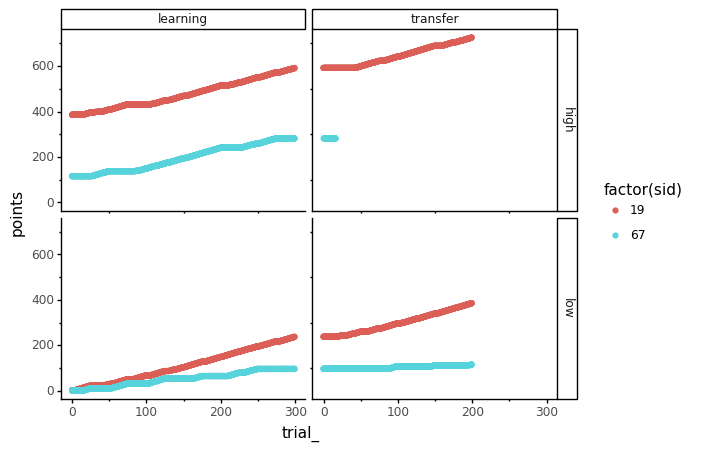

<ggplot: (-9223371928588512382)>


In [32]:
g = (gg.ggplot(all_data, gg.aes('trial_', 'points', color='factor(sid)'))
     + gg.geom_point()
     + gg.facet_grid('phase ~ trial_type')
    )
g.save(os.path.join(plot_dir, '0_PointsOverTrials.png'))
print(g)

## Response times

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/figures\1_RTOverSubtrial.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 53 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 53 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


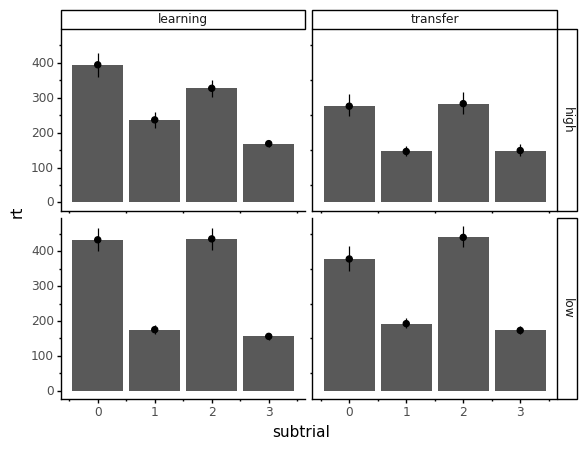

<ggplot: (-9223371928588768298)>


In [33]:
g = (gg.ggplot(all_data, gg.aes('subtrial', 'rt'))
     + gg.stat_summary(geom='bar')
     + gg.stat_summary(geom='pointrange')
     + gg.facet_grid('phase ~ trial_type')
    )
g.save(os.path.join(plot_dir, '1_RTOverSubtrial.png'))
print(g)

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/figures\1_RTOverSubtrial_Details.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 53 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 53 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


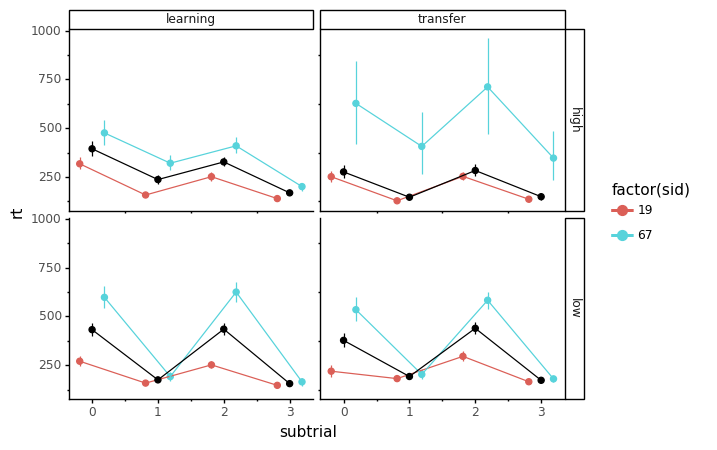

<ggplot: (108268011114)>


In [34]:
# RTs
g = (gg.ggplot(all_data, gg.aes('subtrial', 'rt', color='factor(sid)', group='sid'))
#      + gg.geom_point(position='jitter', alpha=0.3)
     + gg.stat_summary(position=gg.position_dodge(width=0.75))
     + gg.stat_summary(position=gg.position_dodge(width=0.75), geom='line')
     + gg.stat_summary(gg.aes(group=1), color='black')
     + gg.stat_summary(gg.aes(group=1), geom='line', color='black')
#      + gg.geom_violin()
#      + gg.geom_boxplot()
#      + gg.geom_hline(yintercept=5, linetype='dotted')
     + gg.facet_grid('phase ~ trial_type')
    )
g.save(os.path.join(plot_dir, '1_RTOverSubtrial_Details.png'))
print(g)

## Learning curves

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/figures\2_LearnCurves_Block.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 6014 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 6014 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


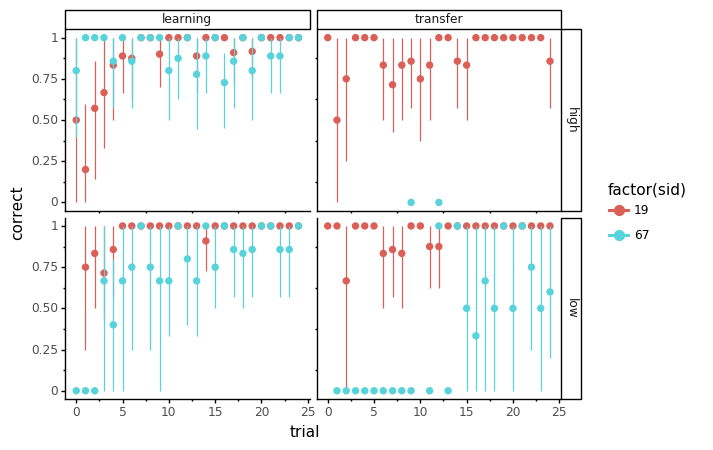

<ggplot: (-9223371928588629637)>


In [35]:
# Learning curves, averaging over goal stars 
learn_curve = (
    gg.ggplot(all_data, gg.aes('trial', 'correct', color='factor(sid)'))
    + gg.stat_summary()
    + gg.facet_grid('phase ~ trial_type')
)
learn_curve.save(os.path.join(plot_dir, '2_LearnCurves_Block.png'))
print(learn_curve)

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/figures\2_LearnCurves_Trial.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 6014 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 6014 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


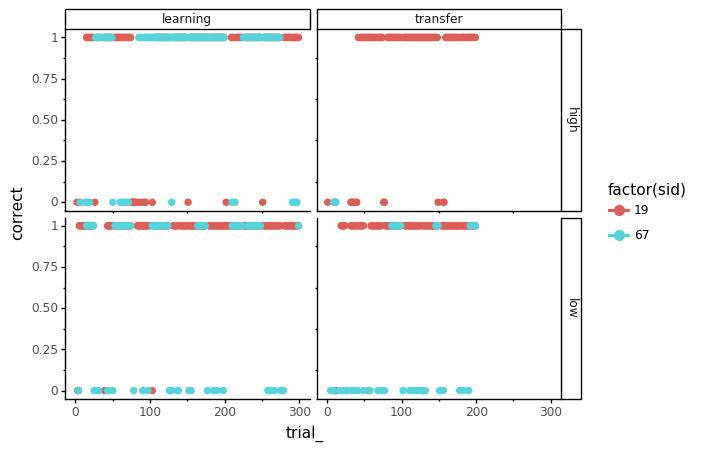

<ggplot: (-9223371928588770444)>


In [36]:
# Learning curves, trial-by-trial
l2 = learn_curve + gg.aes(x='trial_')
l2.save(os.path.join(plot_dir, '2_LearnCurves_Trial.png'))
print(l2)

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/figures\2_LearnCurves_Star.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 6014 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 6014 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


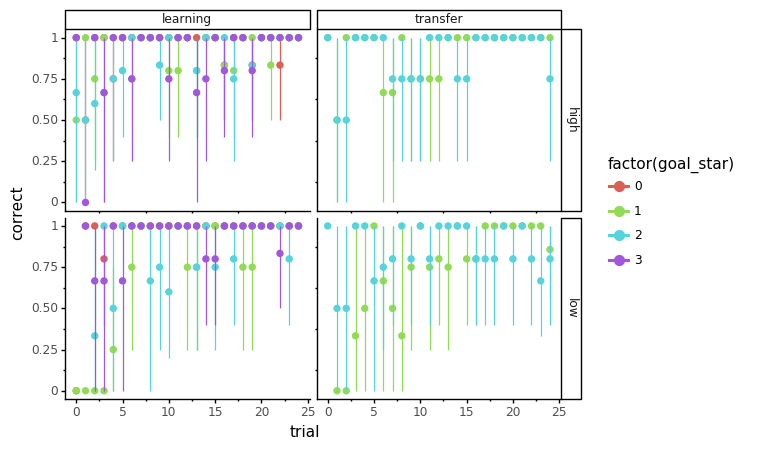

<ggplot: (108266193174)>


In [37]:
# Learning curves, by goal star
l3 = learn_curve + gg.aes(color='factor(goal_star)')
l3.save(os.path.join(plot_dir, '2_LearnCurves_Star.png'))
print(l3)

## Performance by star

In [39]:
id_cols = ['sid', 'phase', 'trial_type', 'goal_star']
sum_dat = all_data.groupby(id_cols).mean().reset_index()[id_cols + ['correct']]
sum_dat

,sid,phase,trial_type,goal_star,correct
0,19,high,learning,0.0,0.985294
1,19,high,learning,1.0,0.963636
2,19,high,learning,2.0,0.755556
3,19,high,learning,3.0,0.945455
4,19,high,transfer,0.0,NaN
5,19,high,transfer,1.0,0.926471
6,19,high,transfer,2.0,0.887500
7,19,high,transfer,3.0,NaN
8,19,low,learning,0.0,0.984375
9,19,low,learning,1.0,0.953125


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/figures\3_PerformanceByStar.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 9 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 9 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 9 rows containing non-finite values.
  data = self.stat.compute_layer

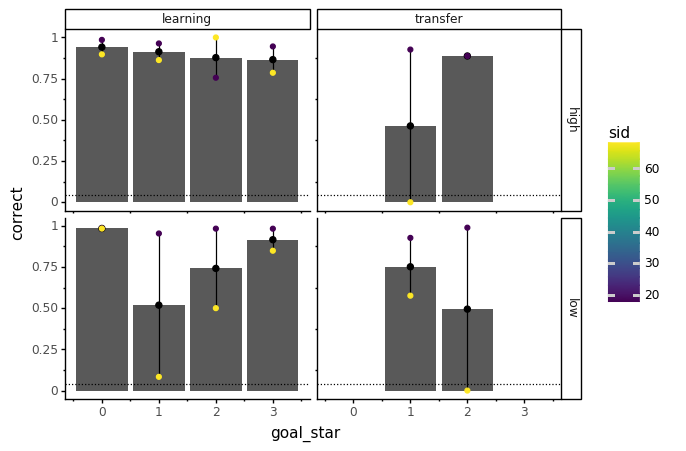

<ggplot: (108264211155)>


In [40]:
chance_perf = 1 / (4 * 3 * 2)
g = (gg.ggplot(sum_dat, gg.aes('goal_star', 'correct'))
     + gg.stat_summary(geom='bar')
     + gg.stat_summary()
     + gg.geom_hline(yintercept=chance_perf, linetype='dotted')
     + gg.geom_point(gg.aes(color='sid'))
     + gg.facet_grid('phase ~ trial_type')
    )
g.save(os.path.join(plot_dir, '3_PerformanceByStar.png'))
print(g)

## Collecting the wrong star

In [42]:
# Get data
id_cols = ['sid', 'phase', 'trial_type', 'unlocked_star']
sub_dat = all_data.loc[all_data.correct == 0].reset_index()
sum_dat = sub_dat.groupby(id_cols).count().reset_index()[id_cols + ['index']]
sum_dat = sum_dat.rename(columns={'index': 'n_unlocked'})
sum_dat.loc[np.isnan(sum_dat.n_unlocked), 'n_unlocked'] = 0
# sum_dat

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/figures\4_CollectingWrongStar.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


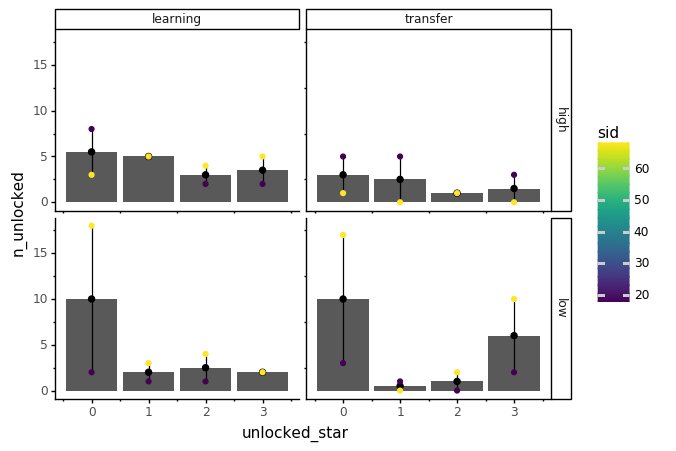

<ggplot: (-9223371928588810054)>


In [43]:
g = (gg.ggplot(sum_dat, gg.aes('unlocked_star', 'n_unlocked', color='sid'))
     + gg.stat_summary(geom='bar')
     + gg.stat_summary()
     + gg.geom_point()
     + gg.facet_grid('phase ~ trial_type')
    )
g.save(os.path.join(plot_dir, '4_CollectingWrongStar.png'))
print(g)

## Perseverance: Following old rules after transfer

In [44]:
all_data[interesting_cols]

,rt,trial_type,phase,block,trial,trial_,subtrial,points,action_id,middle_item_name,goal_star_name,goal_star,correct,unlocked_star,unlocked_star_name,timeout,middle_item_lowTransferRules,middle_item_lowRules,unlocked_star_highTransferRules,unlocked_star_highRules
0,486.195,learning,low,0.0,0.0,0.0,0.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,605.880,learning,low,0.0,0.0,0.0,1.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,1040.145,learning,low,0.0,0.0,0.0,2.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,394.360,learning,low,0.0,0.0,0.0,3.0,3.0,2.0,NaN,0.0,1.0,NaN,-1.0,-1.0,NaN,1.0,NaN,NaN,NaN
4,389.975,learning,low,0.0,1.0,1.0,0.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7131,1401.360,transfer,high,0.0,15.0,15.0,2.0,282.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7132,246.925,transfer,high,0.0,15.0,15.0,3.0,282.0,1.0,1.0,1.0,1.0,NaN,-1.0,-1.0,NaN,1.0,1.0,NaN,NaN
7133,619.470,transfer,high,0.0,16.0,16.0,0.0,282.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7134,231.015,transfer,high,0.0,16.0,16.0,1.0,282.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
all_data['cor_middle_item_lowRules'] = np.invert(np.isnan(all_data['middle_item_lowRules'])).astype(int)
all_data['cor_unlocked_star_highRules'] = np.invert(np.isnan(all_data['unlocked_star_highRules'])).astype(int)

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/figures\5_UsingLearningLowRules.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


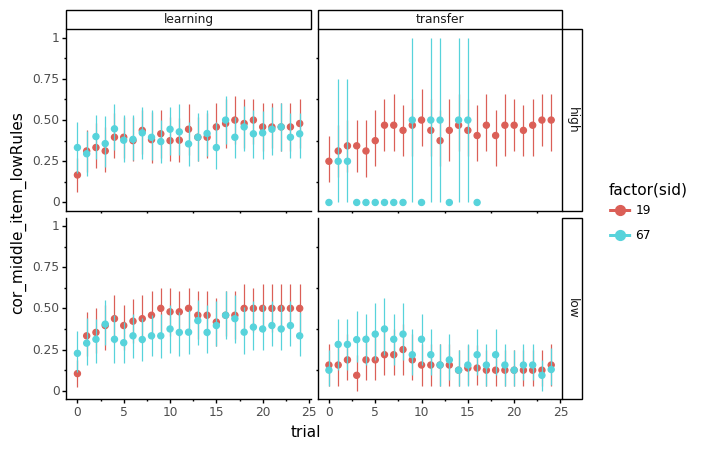

<ggplot: (-9223371928589067481)>


In [46]:
# How often do participants apply the low rules of the learning phase?
# -> Perseveration if they do it during low transfer (low rules don't work any more)!
# -> Confusion if they stop doing it during high transfer (low rules still work)!

g = (gg.ggplot(all_data, gg.aes('trial', 'cor_middle_item_lowRules', color='factor(sid)'))
     + gg.stat_summary()
     + gg.facet_grid('phase ~ trial_type')
    )
g.save(os.path.join(plot_dir, '5_UsingLearningLowRules.png'))
print(g)

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/figures\5_UsingLearningHighRules.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


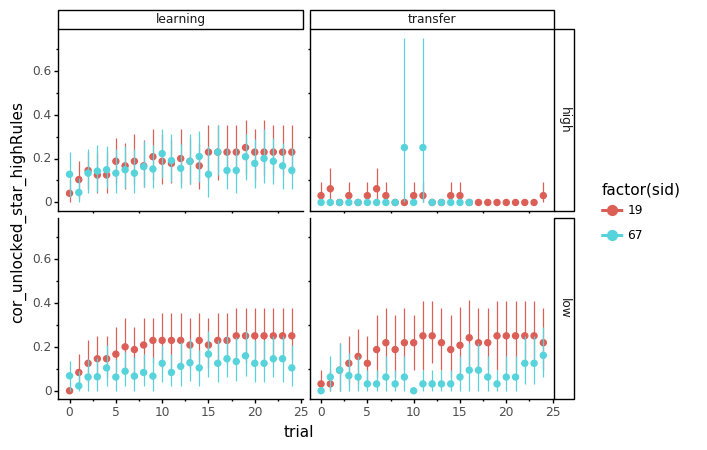

<ggplot: (108266288318)>


In [47]:
# How often do participants apply the high rules of the learning phase?
# -> Perseveration if they do it during high transfer (high rules don't work any more)!
# -> Decline during low transfer is because they lost their middle-level items

g2 = g + gg.aes(y='cor_unlocked_star_highRules')
g2.save(os.path.join(plot_dir, '5_UsingLearningHighRules.png'))
print(g2)